In [1]:
import loadData
import numpy as np
import matplotlib.pyplot as plt
import glob
from quantities import ms, s, Hz
from neo.core import SpikeTrain
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
#Enter path to data folder:
data_root = '/NMA/Mapping Brain Networks/data/allData'

#Get list of files in glob
session_paths = glob.glob(data_root + '/*')

#Groupings of brain regions
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain",  "basal ganglia", "subplate"]
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
                ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
               ]

#Define sessions to load
sessions = [11,12] #Pick which sessions to load.

#Load sessions
dat = {}
for session in sessions:
    dat[session] = {}
    path = session_paths[session]
    
    session_date, mouse_name = loadData.get_session_info(data_root, path)
    good_clusters, cluster_locations = loadData.get_cluster_info(path)
    cluster_spikes = loadData.get_cluster_spikes(path)
    trial_intervals, visualStim_times, goCue_times, response_times, feedback_times, feedback_type = loadData.get_trial_info(path) 
    
    dat[session]['session_date'] = session_date
    dat[session]['mouse_name'] = mouse_name
    dat[session]['good_clusters'] = good_clusters
    dat[session]['cluster_locations'] = cluster_locations
    dat[session]['cluster_spikes'] = cluster_spikes
    dat[session]['trial_intervals'] = trial_intervals
    dat[session]['visualStim_times'] = visualStim_times
    dat[session]['goCue_times'] = goCue_times
    dat[session]['response_times'] = response_times
    dat[session]['feedback_times'] = feedback_times
    dat[session]['feedback_type'] = feedback_type
    
    print('Data for session',session,'loaded.')

Data for session 11 loaded.
Data for session 12 loaded.


In [3]:
#We want to look at only one trial
tDat = dat[11]

In [4]:
#Lets have a look at the keys
print(tDat.keys())

dict_keys(['session_date', 'mouse_name', 'good_clusters', 'cluster_locations', 'cluster_spikes', 'trial_intervals', 'visualStim_times', 'goCue_times', 'response_times', 'feedback_times', 'feedback_type'])


In [5]:
#lets plot a raster plot
def plotRaster(channel_spikes, trial, intervals, visualStims, goCues, responses, feedbacks):
    '''
    This function plots a raster plot
    '''
    
    #Extract single trial from all data
    interval = intervals[trial,:].flatten()
    
    #Onset of visual stim -> t=0 for trial.
    visualStim = visualStims[trial]
    goCue = goCues[trial] - visualStim
    response = responses[trial] - visualStim
    feedback = feedbacks[trial] - visualStim
    
    #Define raster_spikes variable for plot
    raster_spikes = []
    for spikes in channel_spikes:
        raster_spikes.append(spikes[np.where(np.logical_and(spikes>=interval[0], spikes<interval[1]))[0]])
    raster_spikes -=visualStim
    
    #plot the lines:
    plt.axvline(0,ls='--', color='y',label='visualStim')
    plt.axvline(goCue, ls='--', color='r',label='goCue')
    plt.axvline(response, ls='--', color='k', label='response')
    plt.axvline(feedback, ls='--', color='g', label='feedback')
    plt.eventplot(raster_spikes)
    plt.legend()
    plt.xlabel('Time (s)')
    plt.ylabel('Neuron no.')
    plt.title('Raster Plot for trial '+str(trial))
    plt.show()

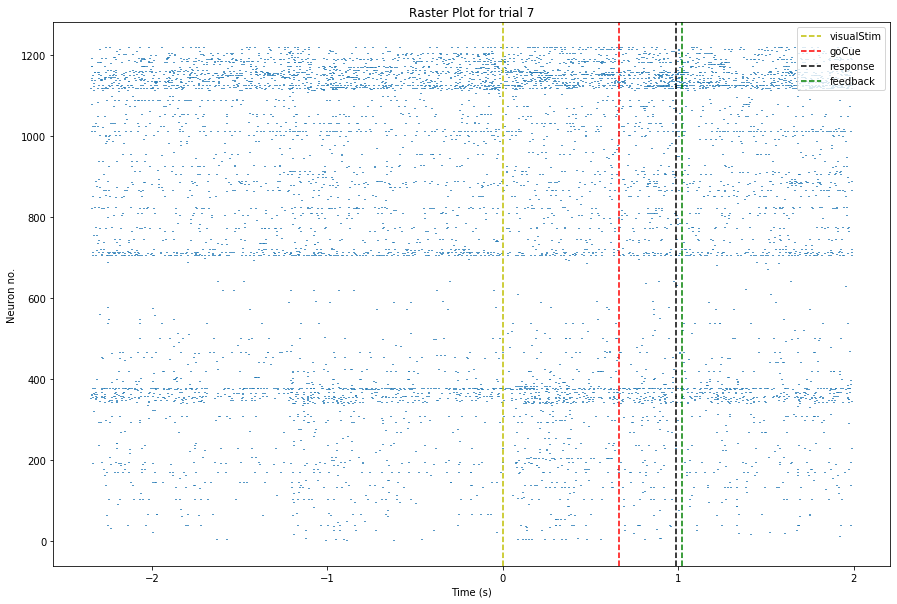

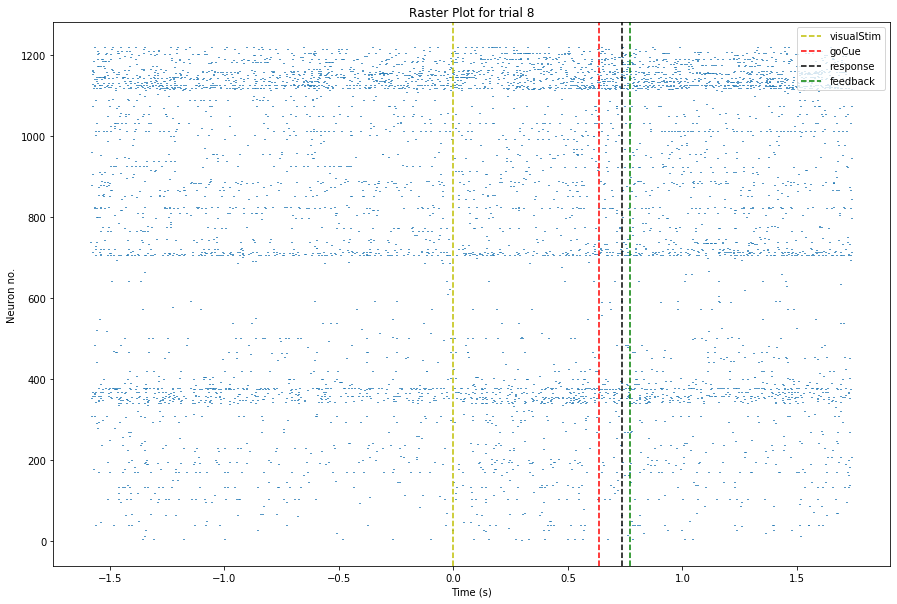

In [6]:
plotRaster(tDat['cluster_spikes'],7,tDat['trial_intervals'],tDat['visualStim_times'],tDat['goCue_times'],tDat['response_times'],tDat['feedback_times'])
plotRaster(tDat['cluster_spikes'],8,tDat['trial_intervals'],tDat['visualStim_times'],tDat['goCue_times'],tDat['response_times'],tDat['feedback_times'])

In [ ]:
#From this section onward we shall try to look at NEO and Elephant

In [73]:
spike_1 = SpikeTrain(tDat['cluster_spikes'][0][1:1000]*s, t_stop = np.max(tDat['cluster_spikes'][0][1:1000])*s)

In [74]:
print(f"spike_1 has {len(spike_1)} spikes:")
print("  t_start:", spike_1.t_start)
print("  t_stop:", spike_1.t_stop)
print("  spike times:", spike_1.times)

spike_1 has 999 spikes:
  t_start: 0.0 s
  t_stop: 226.73296666666667 s
  spike times: [  0.35043333   0.45533333   0.57636667   0.66723333   0.79973333
   0.88286667   0.97743333   1.1945       1.28436667   1.44523333
   1.49706667   1.60326667   1.69286667   1.88263333   1.96243333
   2.03903333   2.24943333   2.32113333   2.4035       2.50126667
   2.627        2.77543333   2.86023333   2.93926667   3.01843333
   3.1727       3.24436667   3.3506       3.44183333   3.49433333
   3.54193333   3.61723333   3.8114       3.91176667   4.0587
   4.22646667   4.3197       4.47823333   4.6026       4.87936667
   4.97163333   5.0611       5.15166667   5.26496667   5.36356667
   5.4918       5.63253333   5.78423333   5.91543333   6.04803333
   6.17536667   6.26046667   6.3451       6.41633333   6.50513333
   6.57813333   6.65886667   6.83416667   6.95583333   7.05623333
   7.26396667   7.35623333   7.64956667   7.8374       7.9872
   8.13726667   8.1779       8.2455       8.51713333   8.650433

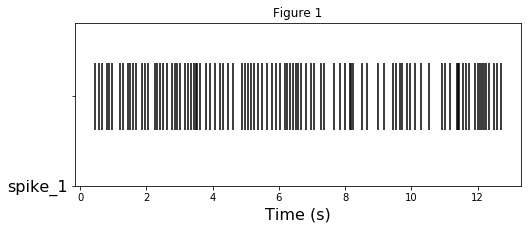

In [75]:
plt.figure(figsize=(8, 3))
plt.eventplot([spike_1[1:100]], linelengths=0.75, color='black')
plt.xlabel('Time (s)', fontsize=16)
plt.yticks([0,1], labels=["spike_1"], fontsize=16)
plt.title("Figure 1");

In [76]:
from elephant.statistics import mean_firing_rate

In [77]:
print("The mean firing rate of spike_1 is", mean_firing_rate(spike_1))

The mean firing rate of spike_1 is 4.406064167407504 1/s


In [81]:
from elephant.statistics import time_histogram, instantaneous_rate

In [82]:
histogram_count = time_histogram([spike_1], 500*ms)

E:\ProgramData\Anaconda3\lib\site-packages\elephant\conversion.py:463: UserWarning: Binning discarded 2 last spike(s) in the input spiketrain.
  n=n_spikes - n_spikes_binned))


<class 'neo.core.analogsignal.AnalogSignal'> of shape (453, 1): 453 samples, 1 channel
sampling rate: 0.002 1/ms
times: [  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5
  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5
  30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5
  36.   36.5  37.   37.5  38.   38.5  39.   39.5  40.   40.5  41.   41.5
  42.   42.5  43.   43.5  44.   44.5  45.   45.5  46.   46.5  47.   47.5
  48.   48.5  49.   49.5  50.   50.5  51.   51.5  52.   52.5  53.   53.5
  54.   54.5  55.   55.5  56.   56.5  57.   57.5  58.   58.5  59.   59.5
  60.   60.5  61.   61.5  62.   62.5  63.   63.5  64.   64.5  65.   65.5
  66.   66.5  67.   67.5  68.   68.5  69.   69.5  70.   70.5  71.   71.5
  72

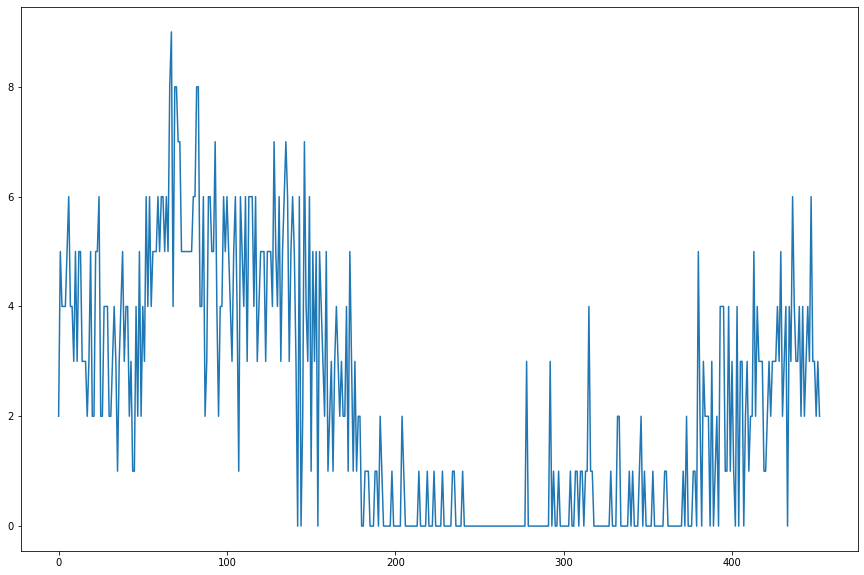

In [84]:
print(type(histogram_count), f"of shape {histogram_count.shape}: {histogram_count.shape[0]} samples, {histogram_count.shape[1]} channel")
print('sampling rate:', histogram_count.sampling_rate)
print('times:', histogram_count.times)
print('counts:', histogram_count.T[0])
plt.plot(histogram_count)
plt.show()

In [64]:
histogram_rate = time_histogram([spike_1], 500*ms, output='rate')

E:\ProgramData\Anaconda3\lib\site-packages\elephant\conversion.py:463: UserWarning: Binning discarded 2 last spike(s) in the input spiketrain.
  n=n_spikes - n_spikes_binned))


In [65]:
print('times:', histogram_rate.times)
print('rate:', histogram_rate.T[0])

times: [  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5
  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5
  30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5
  36.   36.5  37.   37.5  38.   38.5  39.   39.5  40.   40.5  41.   41.5
  42.   42.5  43.   43.5  44.   44.5  45.   45.5  46.   46.5  47.   47.5
  48.   48.5  49.   49.5  50.   50.5  51.   51.5  52.   52.5  53.   53.5
  54.   54.5  55.   55.5  56.   56.5  57.   57.5  58.   58.5  59.   59.5
  60.   60.5  61.   61.5  62.   62.5  63.   63.5  64.   64.5  65.   65.5
  66.   66.5  67.   67.5  68.   68.5  69.   69.5  70.   70.5  71.   71.5
  72.   72.5  73.   73.5  74.   74.5  75.   75.5  76.   76.5  77.   77.5
  78.   78.5  79.   79.5  80.   80.5  81.   

In [85]:
inst_rate = instantaneous_rate(spike_1, sampling_period=50*ms)

In [86]:
print(type(inst_rate), f"of shape {inst_rate.shape}: {inst_rate.shape[0]} samples, {inst_rate.shape[1]} channel")
print('sampling rate:', inst_rate.sampling_rate)
print('times (first 10 samples): ', inst_rate.times[:10])
print('instantaneous rate (first 10 samples):', inst_rate.T[0, :10])

<class 'neo.core.analogsignal.AnalogSignal'> of shape (4534, 1): 4534 samples, 1 channel
sampling rate: 0.02 1/ms
times (first 10 samples):  [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] (0.05*s)
instantaneous rate (first 10 samples): [4.05308041 4.08943981 4.12576189 4.16204107 4.19827215 4.23444892
 4.27056616 4.30661834 4.34259995 4.37850549] Hz


In [88]:
from elephant.kernels import GaussianKernel
inst_rate = instantaneous_rate(spike_1, sampling_period=20*ms, kernel=GaussianKernel(200*ms))

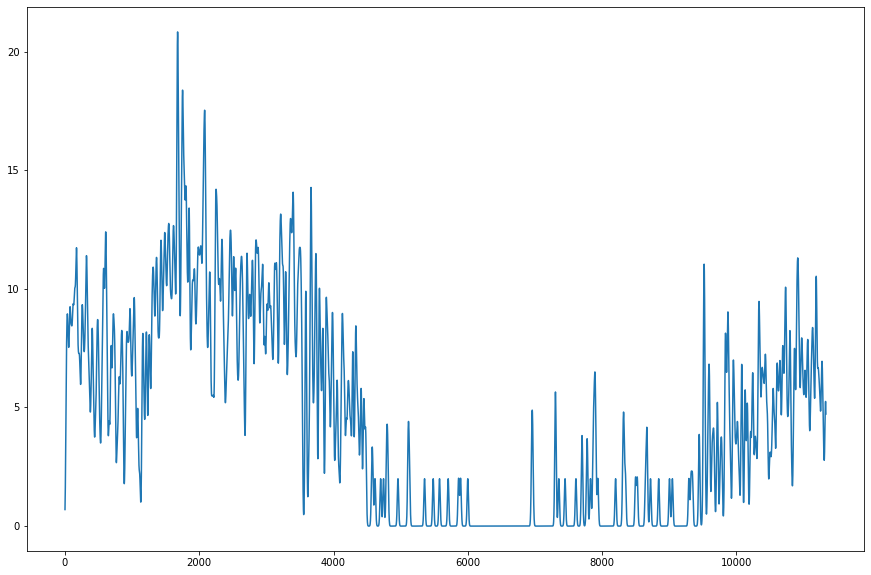

In [89]:
plt.plot(inst_rate)
plt.show()

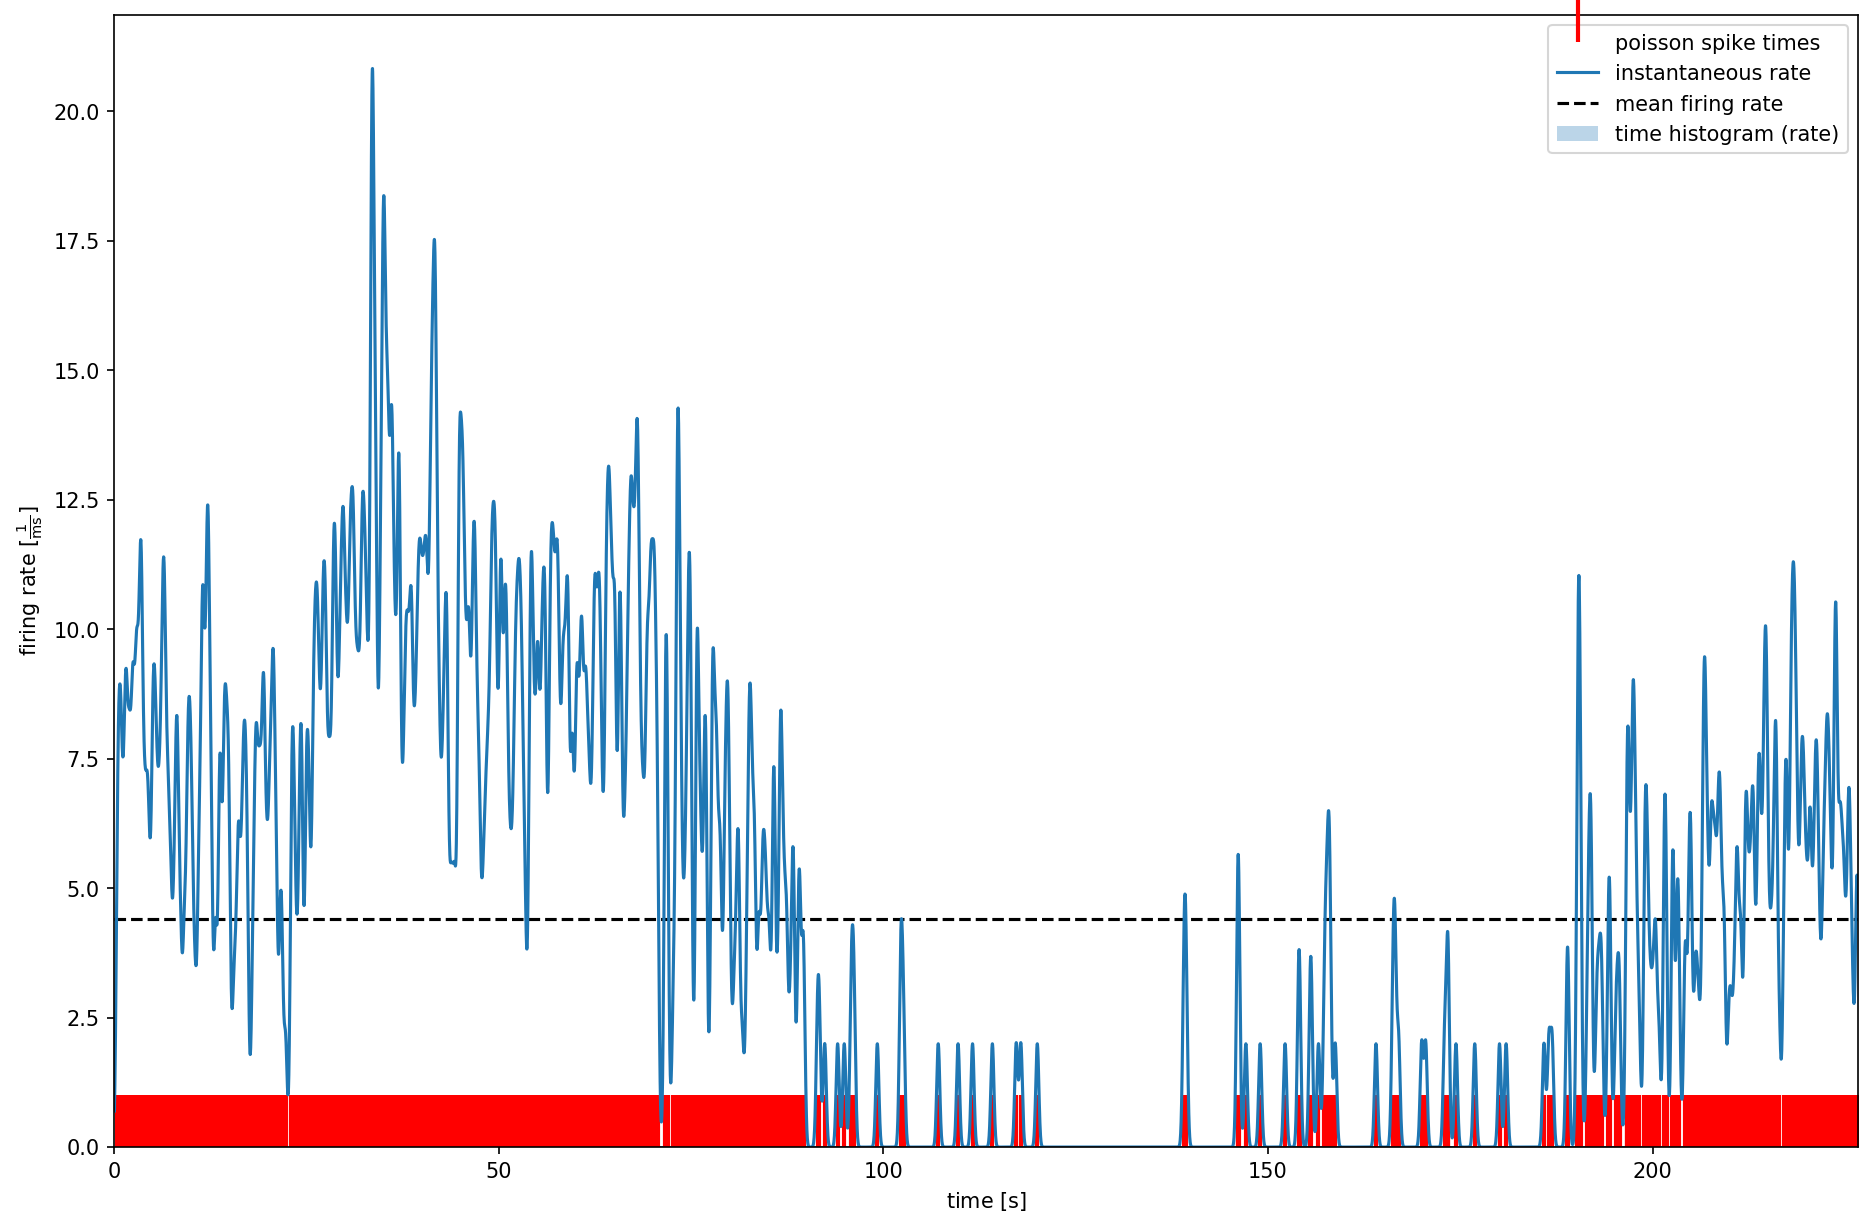

In [95]:
plt.figure(dpi=150)
# plotting the original spiketrain
plt.plot(spike_1, [0]*len(spike_1), 'r', marker=2, ms=25, markeredgewidth=2, lw=0, label='poisson spike times')

# mean firing rate
plt.hlines(mean_firing_rate(spike_1), xmin=spike_1.t_start, xmax=spike_1.t_stop, linestyle='--', label='mean firing rate')

# time histogram
plt.bar(histogram_rate.times.rescale(s), histogram_rate.magnitude.flatten(), width=histogram_rate.sampling_period, align='edge', alpha=0.3, label='time histogram (rate)')

# instantaneous rate
plt.plot(inst_rate.times.rescale(s), inst_rate.rescale(Hz).magnitude.flatten(), label='instantaneous rate')

# axis labels and legend
plt.xlabel('time [{}]'.format(spike_1.times.dimensionality.latex))
plt.ylabel('firing rate [{}]'.format(histogram_rate.dimensionality.latex))
plt.xlim(spike_1.t_start, spike_1.t_stop)
plt.legend()
plt.show()

In [96]:
len(tDat['trial_intervals'])

340

In [138]:
from neo.core import *
blk = Block()
for trial in range(len(tDat['trial_intervals'])):
    interval = tDat['trial_intervals'][trial]
    seg = Segment(name='trial %d' % trial, index=trial)
    for cluster in range(len(tDat['cluster_spikes'])):
        spikes = tDat['cluster_spikes'][cluster]
        spike = SpikeTrain(spikes[np.where(np.logical_and(spikes>=interval[0], spikes<interval[1]))[0]]*s,t_stop=interval[1]*s)
        seg.spiketrains.append(spike)
    blk.segments.append(seg)
    if np.mod(trial,10) == 0:
        print(f'Trial {trial} completed.')

Trial 0 completed.
Trial 10 completed.
Trial 20 completed.
Trial 30 completed.
Trial 40 completed.
Trial 50 completed.
Trial 60 completed.
Trial 70 completed.
Trial 80 completed.
Trial 90 completed.
Trial 100 completed.
Trial 110 completed.
Trial 120 completed.
Trial 130 completed.
Trial 140 completed.
Trial 150 completed.
Trial 160 completed.
Trial 170 completed.
Trial 180 completed.
Trial 190 completed.
Trial 200 completed.
Trial 210 completed.
Trial 220 completed.
Trial 230 completed.
Trial 240 completed.
Trial 250 completed.
Trial 260 completed.
Trial 270 completed.
Trial 280 completed.
Trial 290 completed.
Trial 300 completed.
Trial 310 completed.
Trial 320 completed.
Trial 330 completed.


In [139]:
print(type(blk))

<class 'neo.core.block.Block'>


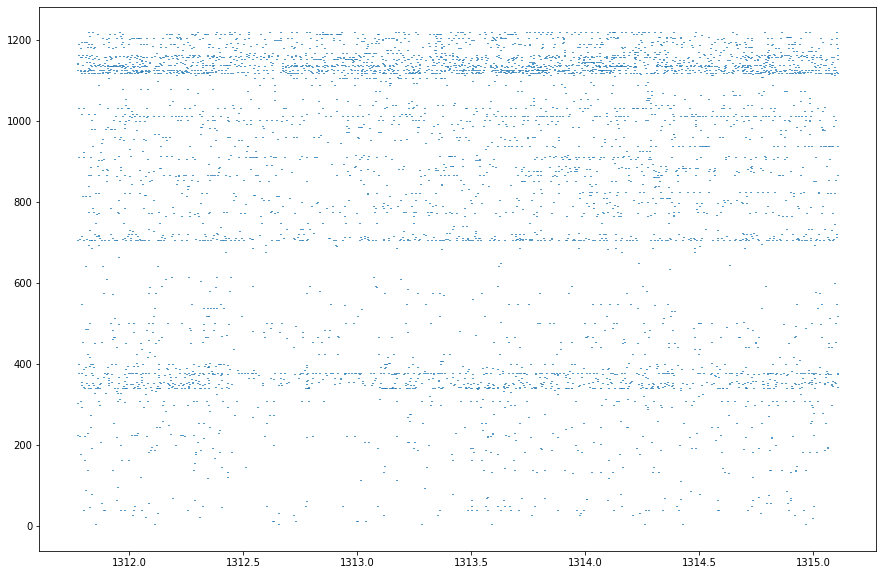

In [141]:
plt.eventplot(blk.segments[320].spiketrains)
plt.show()